# Exploração de dados

Agora iniciaremos o processo de exploração de dados, assumimos que o arquivo 'tratado_houses_to_rent_v2.csv' já tenha sido gerado dentro da pasta 'csv-data', caso este arquivo ainda não tenha sido gerado, basta rodar o notebook 'tratamento-de-dados.ipynb'.

## Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Importação dos dados tratados

In [2]:
data = pd.read_csv('../csv-data/tratado_houses_to_rent_v2.csv')
data

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,0,0,0,0,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,0,0,0,0,1
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,0,0,1,0,0
3,51,2,1,0,2,1,0,270,1112,22,17,1421,0,0,1,0,0
4,25,1,1,0,1,0,0,0,800,25,11,836,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,63,2,1,1,5,0,1,402,1478,24,22,1926,0,0,1,0,0
10121,285,4,4,4,17,1,0,3100,15000,973,191,19260,0,0,0,0,1
10122,70,3,3,0,8,0,1,980,6000,332,78,7390,0,0,0,1,0
10123,120,2,2,2,8,1,1,1585,12000,279,155,14020,0,0,0,1,0


## Explorando as correlações entre as colunas

Utilizaremos o Seaborn para explorar as correlações entre as colunas dos nossos dados, apesar de uma matriz de correlação já ser o suficiente para fazermos esta exploração, faremos um heatap a partir da matriz para melhor visualização:

<Axes: >

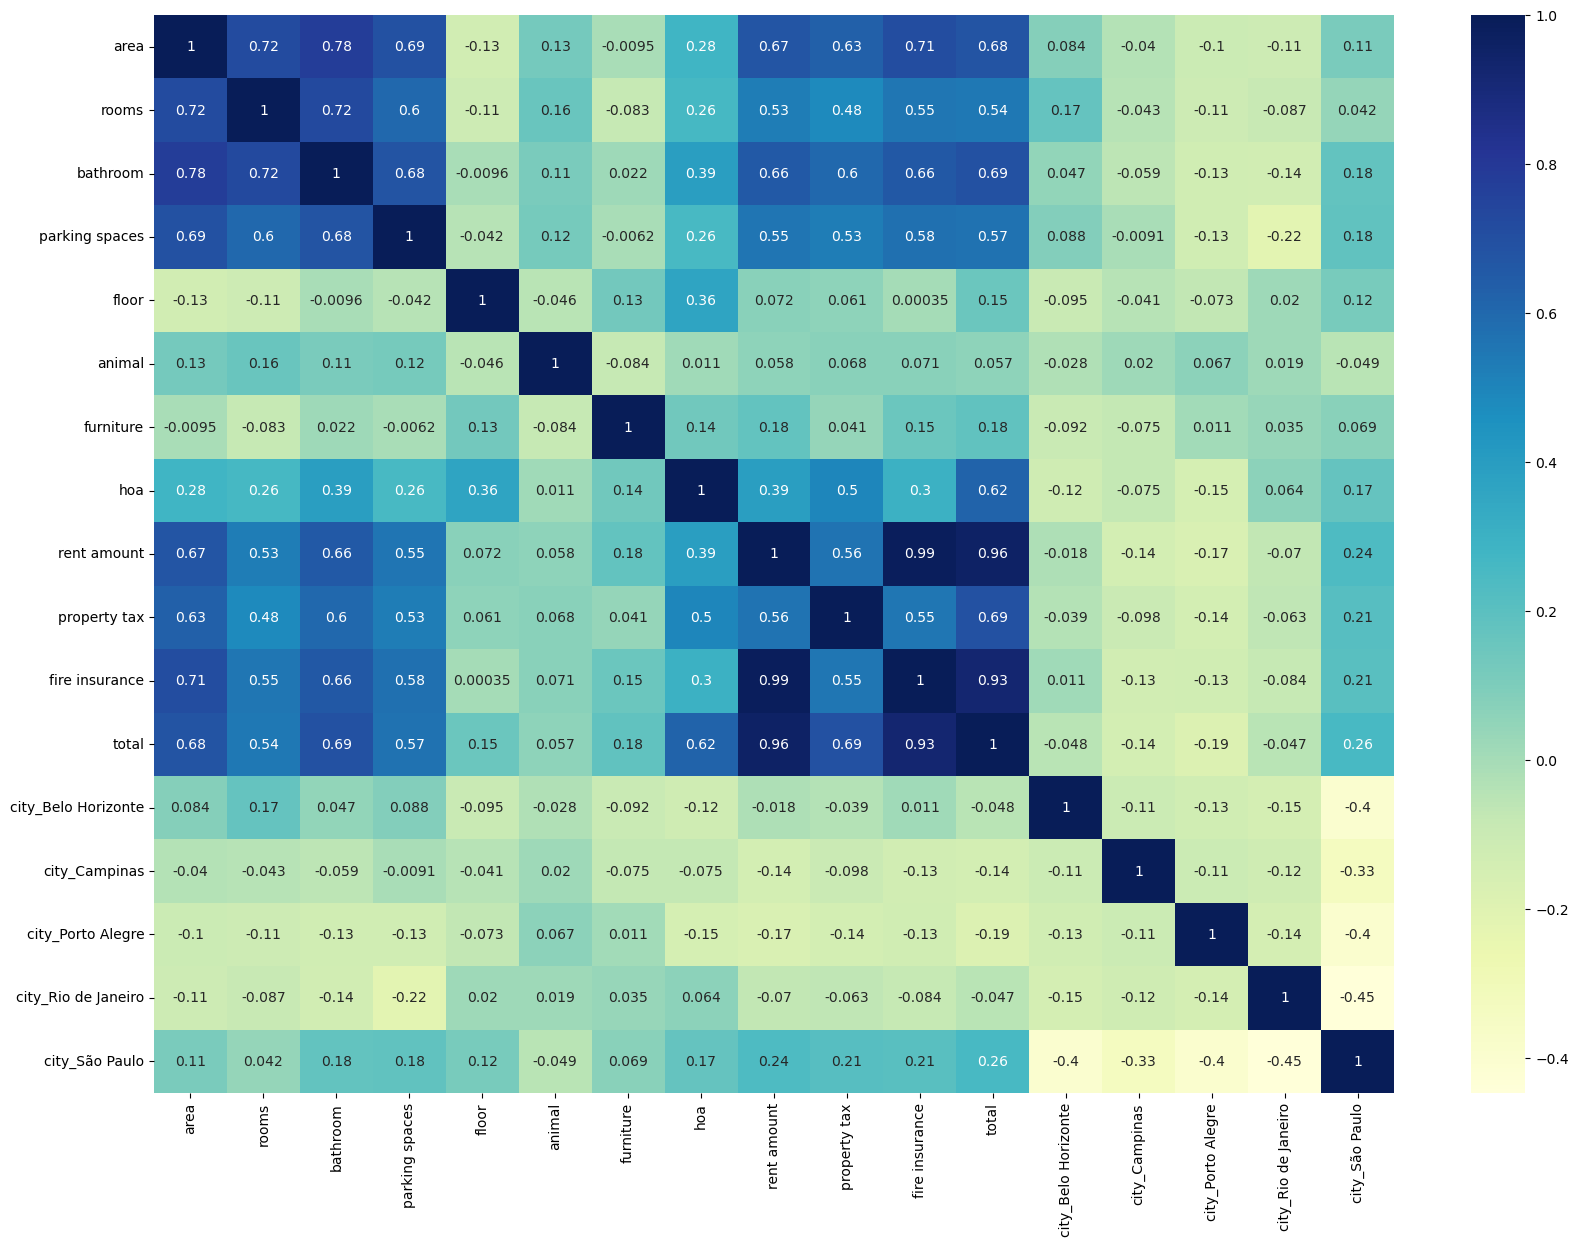

In [3]:
plt.figure(figsize=(20,14))
sb.heatmap(data.corr(), annot=True, cmap='YlGnBu')

Podemos notar fortes correlações entre as colunas 'hoa', 'rent amount', 'property tax' e 'fire insurance' com a coluna 'total', isto faz sentido, pois a coluna 'total' é a soma destas outras colunas. Como não temos mais nenhuma relação significativa usando estas colunas que também não possa ser inferida pela coluna 'total', podemos remover as colunas 'hoa', 'rent amount', 'property tax' e 'fire insurance' em prol de um dataset mais enxuto:

<Axes: >

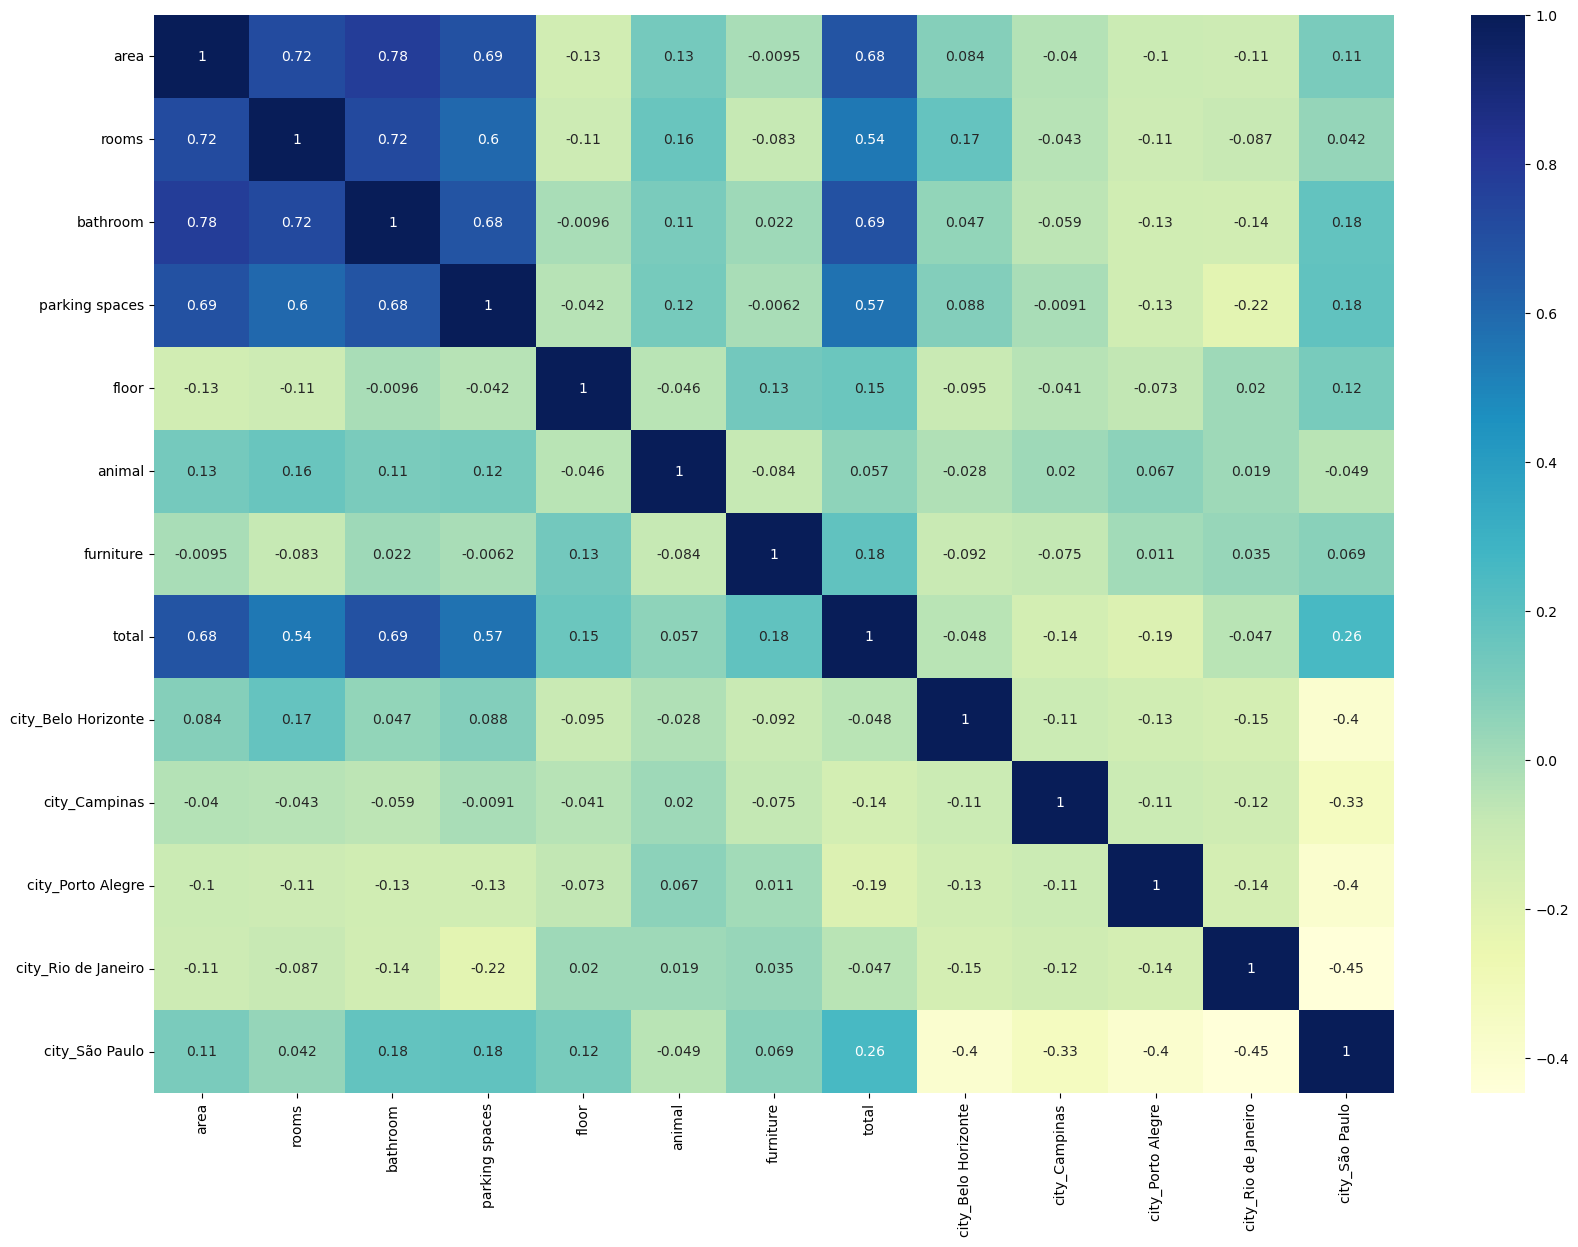

In [4]:
#data.drop(['hoa', 'rent amount', 'property tax', 'fire insurance'], axis=1, inplace=True)

plt.figure(figsize=(20,14))
sb.heatmap(data.corr(), annot=True, cmap='YlGnBu')

Podemos notar também fortes correlações entre as colunas 'area', 'rooms', 'bathroom' e 'parking spaces', isto faz sentido quando falamos da área de um imóvel (mais cômodos pode implicar em maior área), mas não podemos concluir nada com relação as outras áreas no momento, por hora, iremos manter estas colunas intactas, no futuro, durante a fase de preparação de dados para os modelos de machine learning, poderemos usar estas colunas na criação de novos atributos, como por exemplo, uma razão entre número de quartos e número de banheiros.

Já que temos como foco a predição do valor do aluguel de um imóvel, vamos ordenar os valores de correlação com a coluna 'total':

In [5]:
data.corr()['total'].round(decimals=2).sort_values(ascending=False)

total                  1.00
bathroom               0.69
area                   0.68
parking spaces         0.57
rooms                  0.54
city_São Paulo         0.26
furniture              0.18
floor                  0.15
animal                 0.06
city_Belo Horizonte   -0.05
city_Rio de Janeiro   -0.05
city_Campinas         -0.14
city_Porto Alegre     -0.19
Name: total, dtype: float64

Desconsiderando as colunas 'area', 'rooms', 'bathroom' e 'parking spaces', pois já as mencionamos anteriormente, podemos ver que imóveis localizados em São Paulo tendem a ser mais caros, devido a relação positiva com a coluna 'city_São Paulo', logo, podemos concluir que caso um usuário queira pagar menos pelo aluguel de um imóvel e localidade não seja uma restrição, as cidades de Campinas e Porto Alegre tendem a ser mais favoráveis.

Também podemos notar, como fatores que tendem a aumentar o valor do aluguel de um imóvel, o andar onde o imóvel está localizado e se ele já está mobiliado, logo, caso um usuário deseje pagar menos pelo aluguel, imóveis de andar menor e que não estejam mobiliados tendem a ter melhores preços de aluguel.

Podemos notar também que as colunas 'animal', 'city_Belo Horizonte' e 'city_Rio de Janeiro' não possuem uma relação particularmente relevante com a coluna 'total', por hora, iremos manter estas colunas no nosso dataset.

Para verificarmos mais a fundo nossa hipótese de que o aluguel em São Paulo é mais caro, podemos comparar o total e a área dos imóveis, agrupados por cidade:

<Axes: title={'center': 'Área por cidade'}, ylabel='Proportion'>

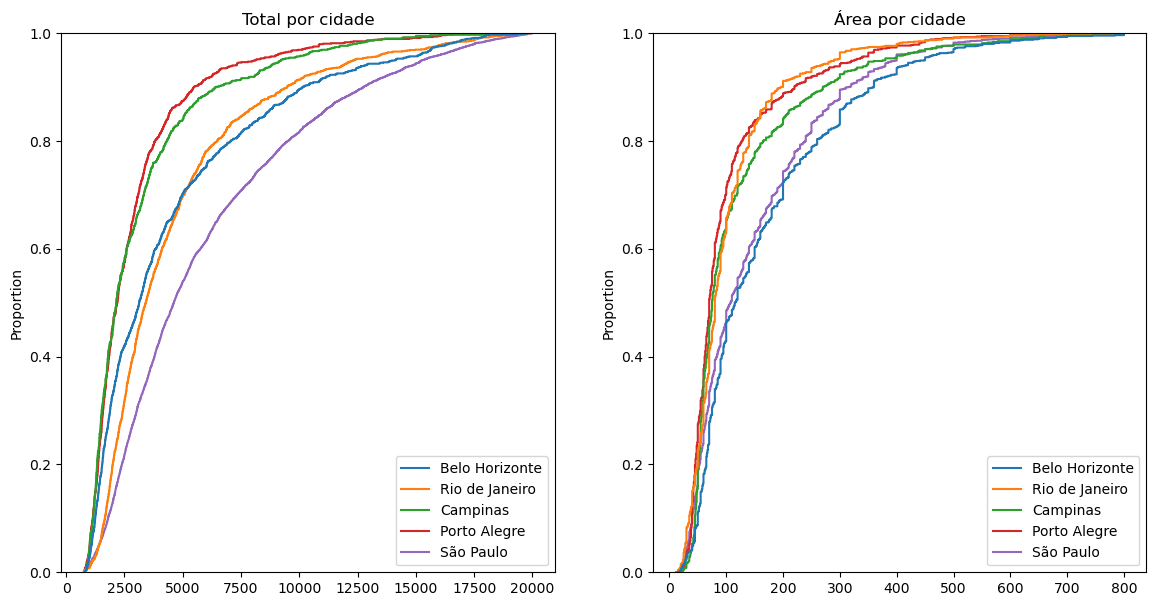

In [6]:
def generate_chart_data(column: str):
    chart_data = {}
    cols = ['city_Belo Horizonte', 'city_Rio de Janeiro', 'city_Campinas', 'city_Porto Alegre', 'city_São Paulo']

    for col in cols:
        entries = data[data[col] == 1]
        chart_data[col.replace('city_', '')] = entries[column]
        
    return chart_data

plt.figure(figsize=(14,7))

plot1 = plt.subplot(1,2,1)
plot1.set_title('Total por cidade')
sb.ecdfplot(generate_chart_data('total'))

plot2 = plt.subplot(1,2,2)
plot2.set_title('Área por cidade')
sb.ecdfplot(generate_chart_data('area'))

Podemos observar nos gráficos acima que, enquanto o custo de alguel em São Paulo é maior, a área dos imóveis não é maior, pois podemos observar que Belo Horizonte possui imóveis com mais área, porém, o custo total do aluguel é mais baixo, dando mais credibilidade a nossa hipótese. 

Podemos ir ainda mais a fundo e tirar a razão entre as médias aritméticas do total e da área do imóvel para as duas cidades:

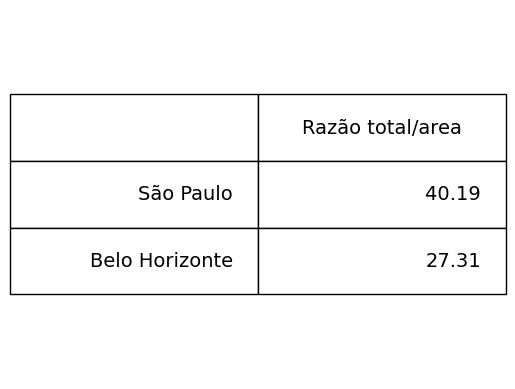

In [7]:
data_sao_paulo = data[data['city_São Paulo'] == 1]
data_belo_horizonte = data[data['city_Belo Horizonte'] == 1]

ratio_sao_paulo = (data_sao_paulo.total.mean() / data_sao_paulo.area.mean()).round(decimals=2)
ratio_belo_horizonte = (data_belo_horizonte.total.mean() / data_belo_horizonte.area.mean()).round(decimals=2)

table_data = [
    ['São Paulo', ratio_sao_paulo], 
    ['Belo Horizonte', ratio_belo_horizonte]
]

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=table_data, colLabels=[None, 'Razão total/area'], loc='center')
table.set_fontsize(14)
table.scale(1,4)

Esta razão total/area pode ser útil no futuro quando entrarmos na fase de criação de atributos, mas por hora não iremos adiciona-la ao dataset.

Também podemos medir a frequência de imóveis mobiliados e não mobiliados entre as duas cidades, nota-se que Belo Horizonte também possui mais imóveis sem mobilia, o que pode contribuir para aluguéis mais baixos:

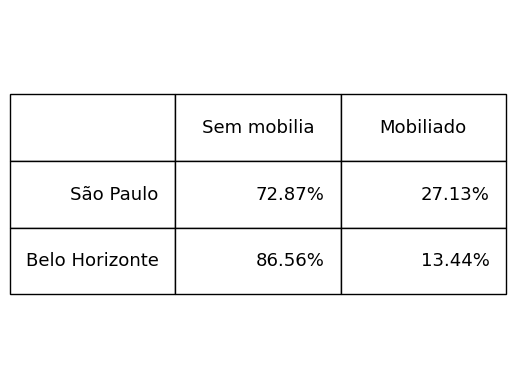

In [8]:
def get_frequency(city: str, col: str):
    return (data[data[city] == 1][col].value_counts(normalize=True) * 100).round(decimals=2)

furniture_sp = get_frequency('city_São Paulo', 'furniture')
furniture_bh = get_frequency('city_Belo Horizonte', 'furniture')

table_data = [
    ['São Paulo', *[f'{f}%' for f in furniture_sp]], 
    ['Belo Horizonte', *[f'{f}%' for f in furniture_bh]]
]

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=table_data, colLabels=[None, 'Sem mobilia', 'Mobiliado'], loc='center')
table.set_fontsize(14)
table.scale(1,4)

Também podemos medir a frequência dos primeiros andares de cada cidade:

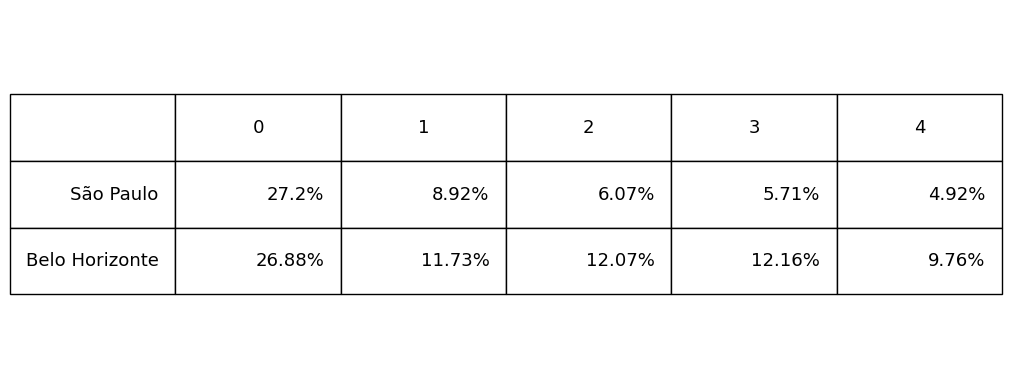

In [9]:
floor_sp = get_frequency('city_São Paulo', 'floor').sort_index()[:5]
floor_bh = get_frequency('city_Belo Horizonte', 'floor').sort_index()[:5]

table_data = [
    ['São Paulo', *[f'{f}%' for f in floor_sp]], 
    ['Belo Horizonte', *[f'{f}%' for f in floor_bh]]
]

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=table_data, colLabels=[None, *range(5)] ,loc='center')
table.set_fontsize(14)
table.scale(2,4)

Podemos observar que, embora ambas as cidades tenham frequências similares de imóveis térreos, Belo Horizonte possui maior oferta de imóveis nos primeiros quatro andares, afirmando mais ainda nossa hipótese quanto ao custo benefício dos imóveis da cidade.

## Salvando o dataset

Como fizemos mais algumas alterações no nosso dataset, devemos salva-lo em um arquivo csv:

In [10]:
data.to_csv('../csv-data/explorado_houses_to_rent_v2.csv', index=False)

No próximo notebook, daremos início ao processo de preparação do nosso dataset para uso nos algorítmos selecionados, iremos balancear e trabalhar na criação de novos atributos afim de gerar melhor acurácia em nossas predições.